# <center> `Statistics Project on Hypothesis Testing`</center>

## Problem Statement

<p> 
In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.
</p>

## Research Question

<p> 
Is there a relationship between total fare amount and payment type?
Can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?
    
</p>

### Import Libraries

In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings

warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
# Loading dataset
df = pd.read_csv('yellow_tripdata_2020-01.csv')

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


### Exploratory Data analysis

In [4]:
# Find dimensions of data - rows and columns
print("Data Dimensions:", df.shape)

Data Dimensions: (6405008, 18)


In [5]:
# Checking data types
print("Data Types:")
print(df.dtypes)

Data Types:
VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object


In [6]:
# Converting object type into datetime format of pickup and dropoff
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
# Calculate duration in minutes
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [8]:
# Dropping unnecessary columns
df = df[['passenger_count', 'payment_type', 'fare_amount', 'trip_distance', 'duration']]

In [9]:
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.2,4.800000
1,1.0,1.0,7.0,1.2,7.416667
2,1.0,1.0,6.0,0.6,6.183333
3,1.0,1.0,5.5,0.8,4.850000
4,1.0,2.0,3.5,0.0,2.300000


In [10]:
# Checking missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64


In [11]:
# Dropping missing values
df.dropna(inplace=True)

In [12]:
# Convert data types from float to int
df['passenger_count'] = df['passenger_count'].astype('int64')
df['payment_type'] = df['payment_type'].astype('int64')

In [13]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

In [14]:
# Apply condition on payment type and passenger count
df = df[df['payment_type'].isin([1, 2])]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [15]:
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.2,4.800000
1,1,1,7.0,1.2,7.416667
2,1,1,6.0,0.6,6.183333
3,1,1,5.5,0.8,4.850000
4,1,2,3.5,0.0,2.300000


In [16]:
# Replace payment type into Card and cash
df['payment_type'].replace({1: 'Card', 2: 'Cash'}, inplace=True)

In [17]:
# Remove outliers
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

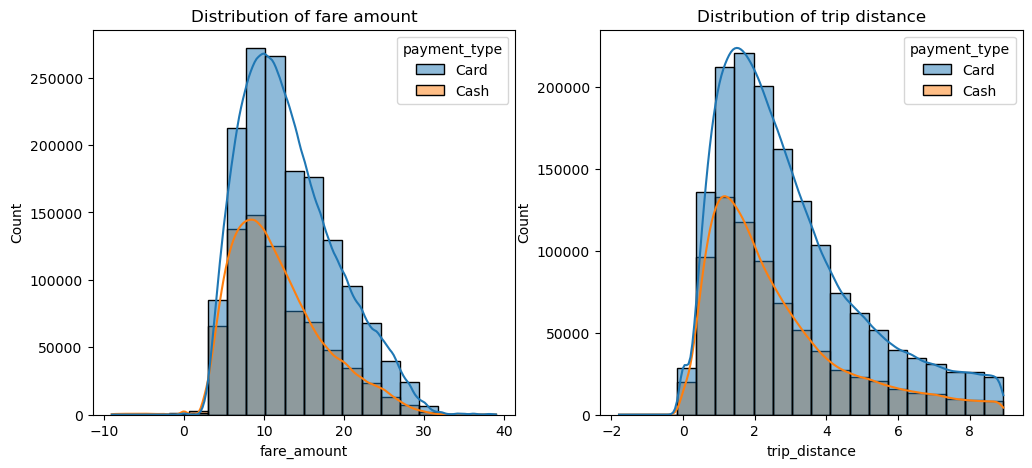

In [18]:
# Plotting distributions of fare_amount and trip_distance based on payment_type
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Distribution of fare amount')
sns.histplot(data=df, x='fare_amount', hue='payment_type', bins=20, kde=True)

plt.subplot(1, 2, 2)
plt.title('Distribution of trip distance')
sns.histplot(data=df, x='trip_distance', hue='payment_type', bins=20, kde=True)

plt.show()

### Statistical Analysis


In [20]:
# Statistical analysis
stats_summary = df.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

# Print a formatted statistical summary
print("Statistical Summary:")
for payment_type, stats in stats_summary.iterrows():
    print(f"\nPayment Type: {payment_type}")
    print("-----------------------------")
    print(f"Mean Fare Amount: {stats['fare_amount']['mean']:.2f} +/- {stats['fare_amount']['std']:.2f}")
    print(f"Mean Trip Distance: {stats['trip_distance']['mean']:.2f} +/- {stats['trip_distance']['std']:.2f}")


Statistical Summary:

Payment Type: Card
-----------------------------
Mean Fare Amount: 13.15 +/- 5.90
Mean Trip Distance: 2.97 +/- 2.00

Payment Type: Cash
-----------------------------
Mean Fare Amount: 11.70 +/- 5.68
Mean Trip Distance: 2.59 +/- 1.91


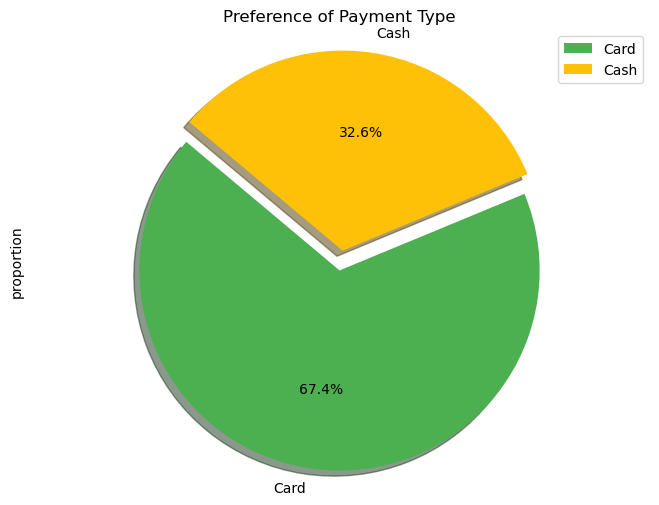

In [24]:
# Pie chart showing the preference of Payment Type
plt.figure(figsize=(8, 6))  # Set the figure size for better visualization
plt.title('Preference of Payment Type')

# Generate the pie chart
pie_chart = df['payment_type'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', colors=['#4CAF50', '#FFC107'], explode=(0.1, 0), shadow=True, startangle=140)

# Add a legend with proper labels
plt.legend(labels=df['payment_type'].value_counts().index, loc="best")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.show()


In [25]:
# Grouping by payment_type and passenger_count
passenger_count = df.groupby(['payment_type', 'passenger_count']).size().unstack(fill_value=0)

In [26]:
# Calculating percentage of passengers based on payment_type and passenger_count
passenger_count['Total'] = passenger_count.sum(axis=1)
passenger_count_perc = passenger_count.div(passenger_count['Total'], axis=0) * 100

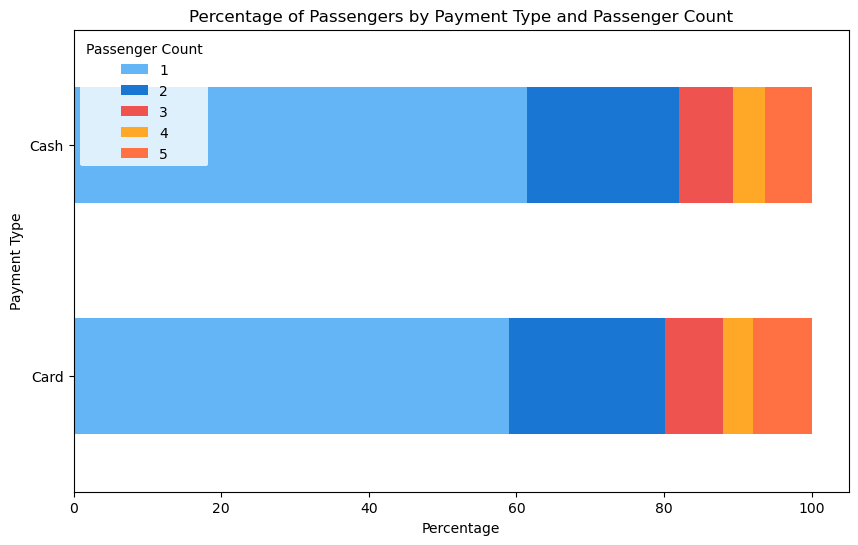

In [30]:
# Define colors for each passenger count
colors = ['#64B5F6', '#1976D2', '#EF5350', '#FFA726', '#FF7043']  

# Plotting percentage of passengers based on payment_type and passenger_count
ax = passenger_count_perc.drop(columns='Total').plot(kind='barh', stacked=True, color=colors, figsize=(10, 6))

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Payment Type')
plt.title('Percentage of Passengers by Payment Type and Passenger Count')

# Remove legend title border
ax.legend(title='Passenger Count', edgecolor='none')

# Show the plot
plt.show()


### Hypothesis testing



**Null hypothesis:** There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative hypothesis:** There is a difference in average fare between customers who use credit cards and customers who use cash.

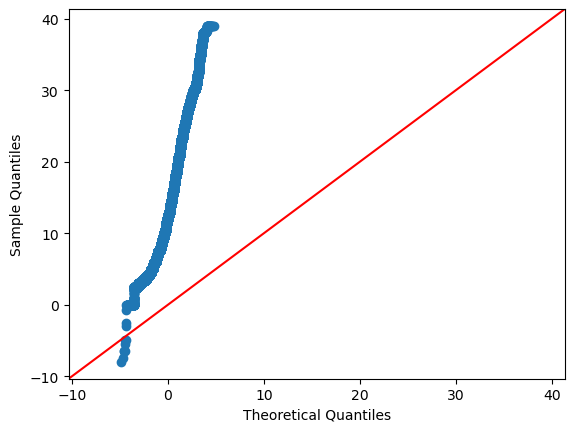

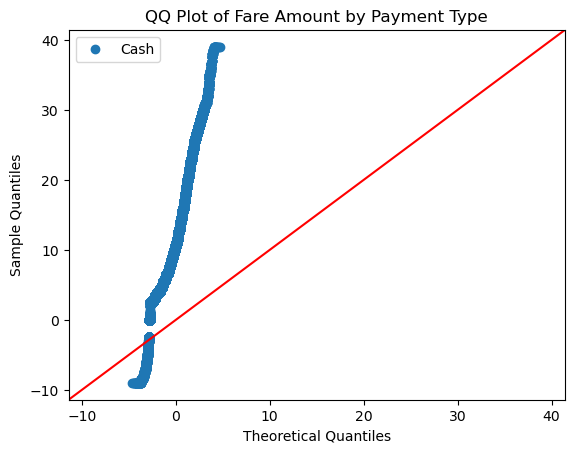

In [32]:
# QQ Plot
sm.qqplot(df[df['payment_type'] == 'Card']['fare_amount'], line='45', label='Card')
sm.qqplot(df[df['payment_type'] == 'Cash']['fare_amount'], line='45', label='Cash')
plt.title("QQ Plot of Fare Amount by Payment Type")
plt.legend()
plt.show()

In [36]:
# T-test
t_stats, p_value = st.ttest_ind(df[df['payment_type'] == 'Card']['fare_amount'],
                                 df[df['payment_type'] == 'Cash']['fare_amount'], equal_var=False)
print('T statistic:', t_stats, 'p-value:', p_value)

T statistic: 180.26443434499288 p-value: 0.0


## Visualisation - 2D and 3D

In [38]:
import numpy as np

# T-test
card_fare = df[df['payment_type'] == 'Card']['fare_amount']
cash_fare = df[df['payment_type'] == 'Cash']['fare_amount']
t_stats, p_value = st.ttest_ind(card_fare, cash_fare, equal_var=False)

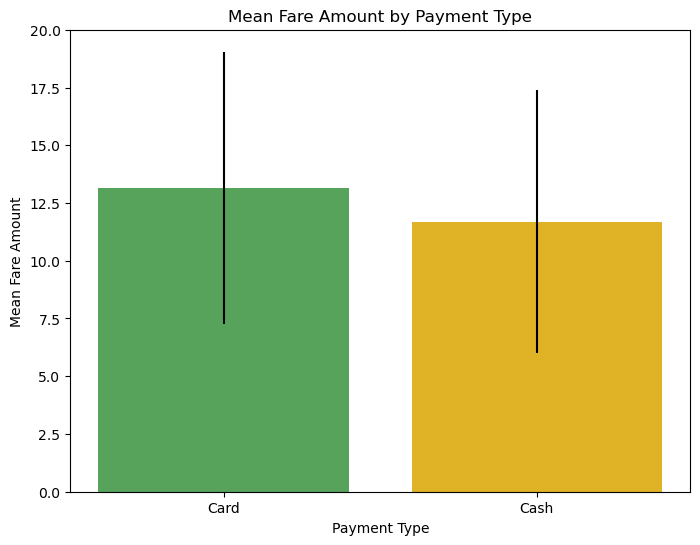

In [39]:
# 2D Visualization
plt.figure(figsize=(8, 6))

# Plotting mean fare amount and confidence intervals
sns.barplot(x=['Card', 'Cash'], y=[card_fare.mean(), cash_fare.mean()], ci='sd', palette=['#4CAF50', '#FFC107'])

# Adding error bars
plt.errorbar(x=['Card', 'Cash'], y=[card_fare.mean(), cash_fare.mean()], yerr=[card_fare.std(), cash_fare.std()], fmt='none', color='black')

# Adding title and labels
plt.title('Mean Fare Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Mean Fare Amount')
plt.show()

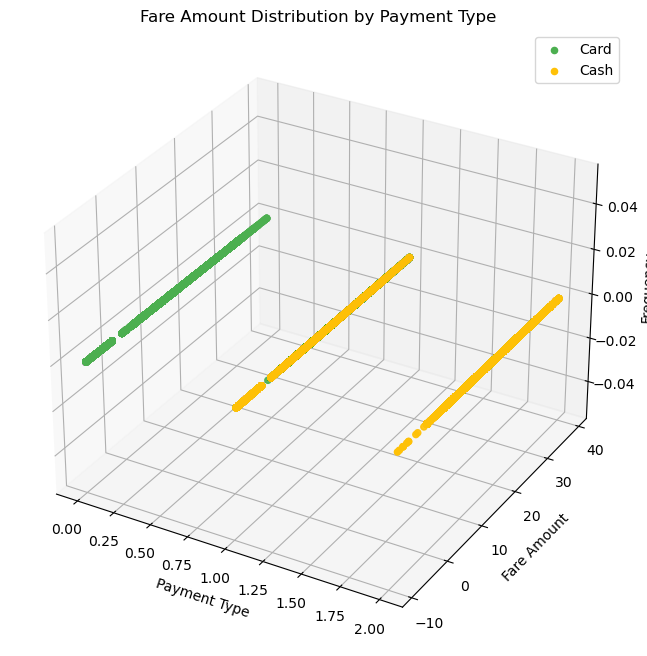

In [40]:
# 3D Visualization
from mpl_toolkits.mplot3d import Axes3D

# Generate data points
x = np.zeros(len(card_fare) + len(cash_fare))
x[:len(card_fare)] = 1  # Card payment
y = np.concatenate([card_fare.values, cash_fare.values])

# Create scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, zs=0, zdir='z', s=20, c='#4CAF50', depthshade=True, label='Card')  # Card payment
ax.scatter(x+1, y, zs=0, zdir='z', s=20, c='#FFC107', depthshade=True, label='Cash')  # Cash payment

# Set labels
ax.set_xlabel('Payment Type')
ax.set_ylabel('Fare Amount')
ax.set_zlabel('Frequency')

# Add legend
plt.legend()

plt.title('Fare Amount Distribution by Payment Type')
plt.show()

# <center> `Summarize the content`</center>

## Steps follows to perform Statiscal Analysis

1. **Data Loading and Exploration:**
   - The code starts by importing necessary libraries and loading the dataset (`yellow_tripdata_2020-01.csv`). It then performs exploratory data analysis (EDA) to understand the structure and content of the data.
   - It converts the pickup and drop-off timestamps to datetime format and calculates the trip duration in minutes.
   - Unnecessary columns are dropped, missing values are removed, and data types are adjusted.

2. **Data Cleaning:**
   - Duplicate records are dropped, and outlier removal is performed using the Interquartile Range (IQR) method to filter out extreme values in numerical features like fare amount, trip distance, and duration.

3. **Data Visualization:**
   - Distributions of fare amounts and trip distances are plotted based on payment types (Card or Cash) to visualize any differences.
   - The code also generates a pie chart to illustrate the preference of payment types among passengers.

4. **Statistical Analysis:**
   - Statistical measures such as mean and standard deviation of fare amounts and trip distances are calculated for different payment types.
   - The percentage of passengers based on payment type and passenger count is computed and visualized using a stacked bar chart.

5. **Hypothesis Testing:**
   - A hypothesis test (T-test) is conducted to determine whether there's a significant difference in average fare between customers who use credit cards and customers who use cash.
   - Additionally, a QQ plot is created to assess the normality of fare amount distributions for both payment types.

6. **Outcome:**
   - The final output includes statistical measures, visualizations, and hypothesis testing results, providing insights into the relationship between payment methods and fare amounts in the taxi booking sector.

## Theoretical Outcome:

* If the hypothesis test results in a low **p-value** (typically below a significance level like 0.05), it suggests that there is a significant difference in average fare amounts between customers who use credit cards and those who use cash. 

* This implies that payment method indeed influences fare pricing, potentially indicating that certain payment methods may lead to higher fares. 

* The data-driven insights obtained from this analysis can be used to devise strategies to nudge customers towards payment methods that generate higher revenue for drivers without negatively impacting customer experience.

# <center> `******`</center>